In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold

from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression

In [46]:
pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/46/43/03fa53f027e78af4a6bee3564d05cb34d9f5b924dc69c85f8ef5cb950ff1/keras-3.4.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 353.1 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.1 MB 353.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.1 MB 275.8 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.1 MB 275.8 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.1 MB 275.8 kB/s eta 


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\EXCELR\Assignments\Neural networks\Alphabets_data.csv")
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
data.size

340000

In [5]:
data.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [6]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
data.nunique()

letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64

In [9]:
data.corr()["xedge"].sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\822601466.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["xedge"].sort_values(ascending=False)


xedge     1.000000
onpix     0.627507
width     0.557251
xbox      0.489155
ybox      0.274431
height    0.265243
xbar      0.144325
x2bar     0.142132
yedge     0.108411
x2ybar    0.053566
xedgey    0.002849
xy2bar   -0.008753
ybar     -0.036722
yedgex   -0.049789
xybar    -0.175676
y2bar    -0.384018
Name: xedge, dtype: float64

In [10]:
data[data.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [11]:
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features

Index(['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge',
       'yedgex'],
      dtype='object')

In [12]:
data.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\4149109524.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.xbox, ax = ax[0,0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\4149109524.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.ybox, ax = ax[0,1])
C:\Users\Admin\AppDa

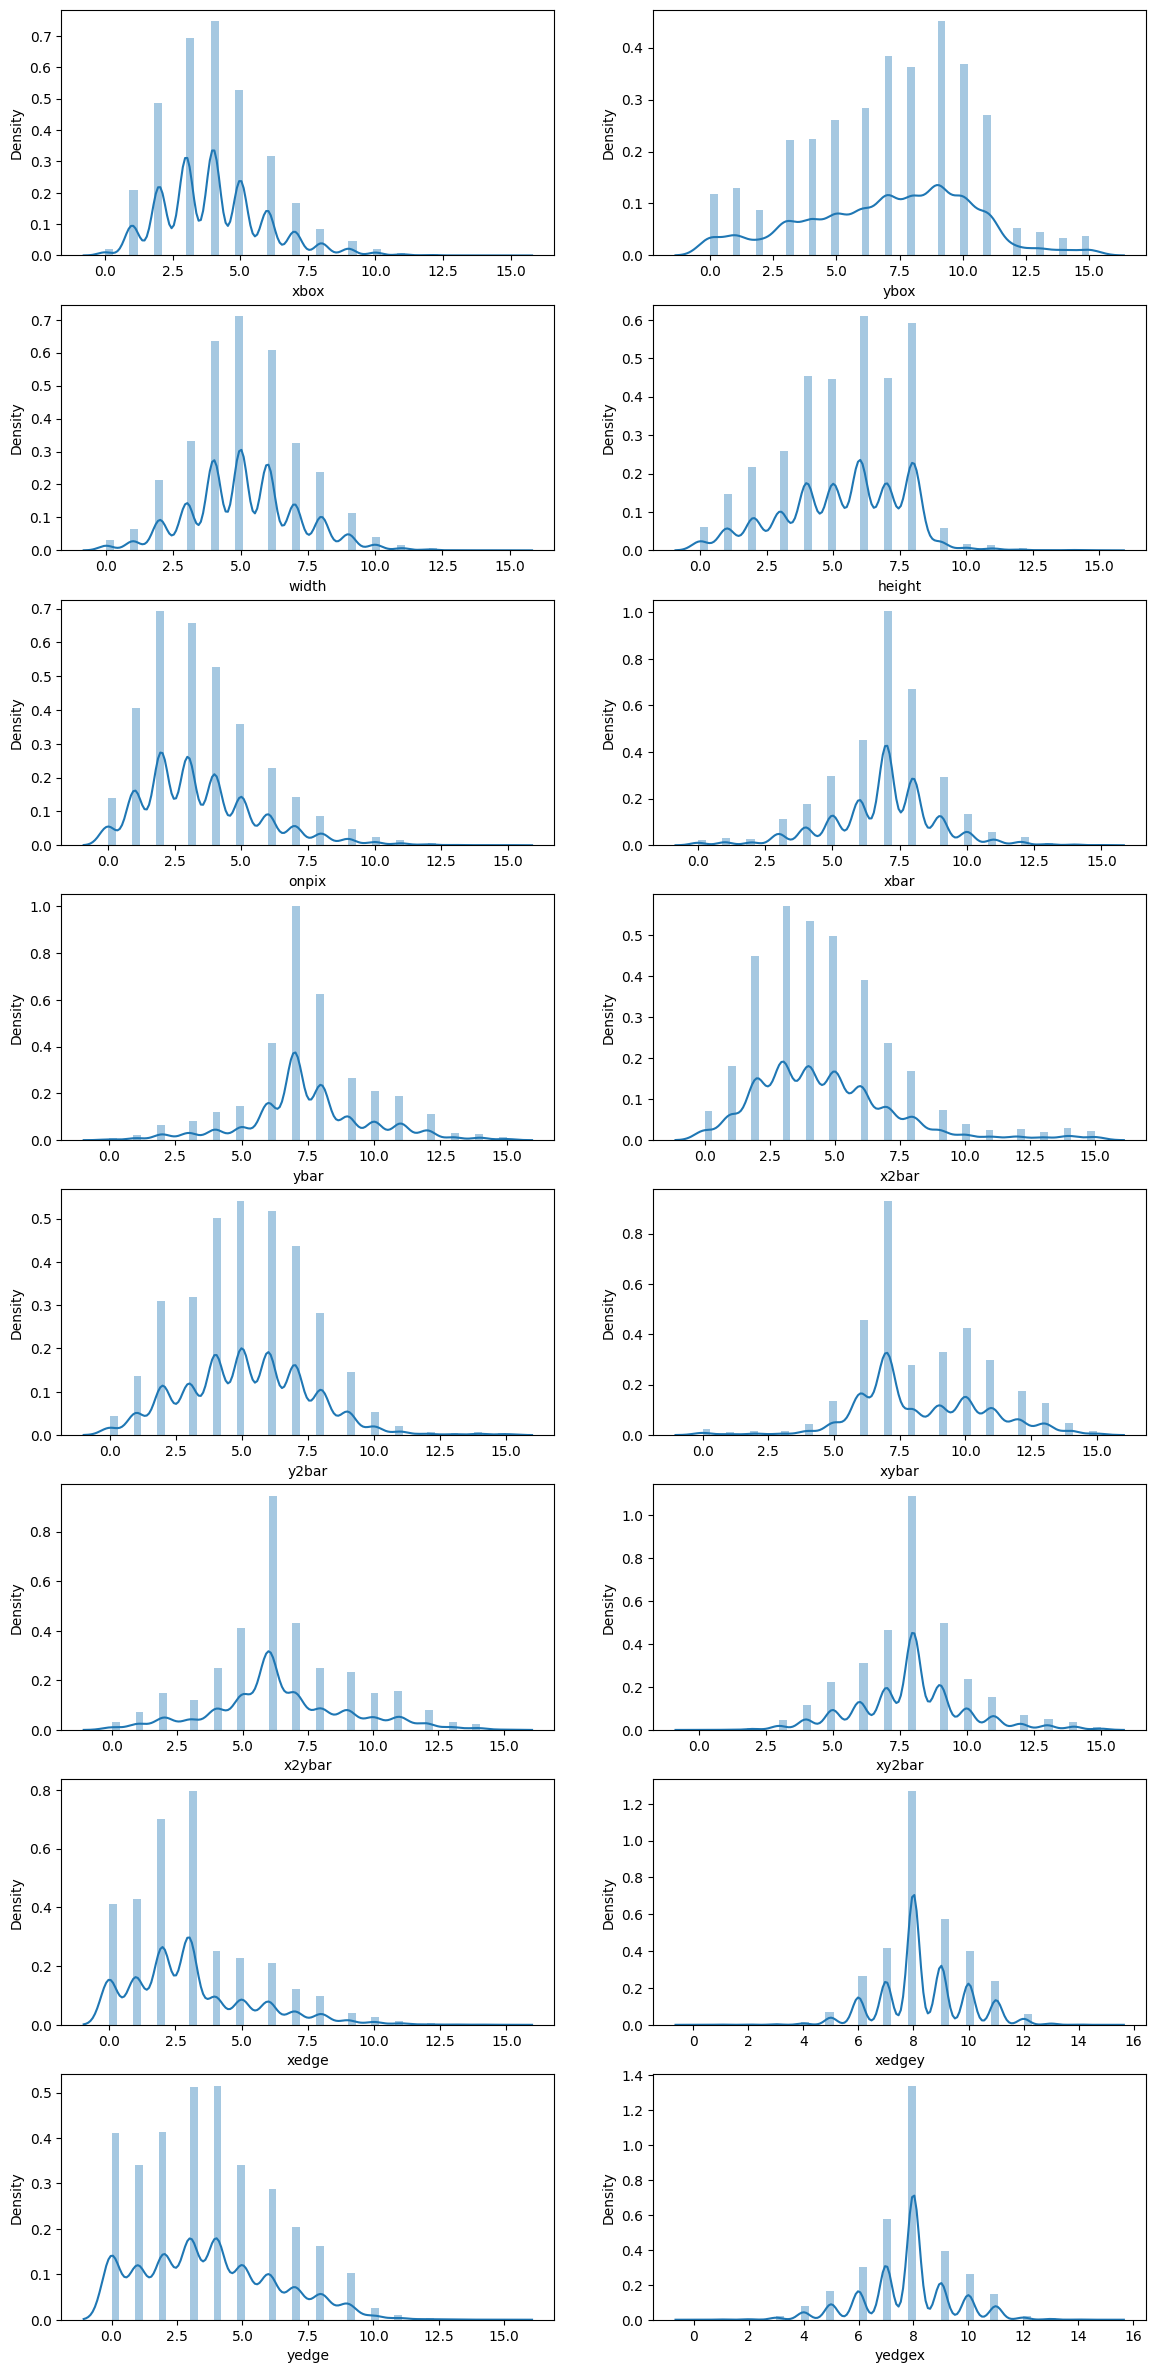

In [16]:
fig, ax = plt.subplots(8,2, figsize = (14,30))

sns.distplot(data.xbox, ax = ax[0,0])
sns.distplot(data.ybox, ax = ax[0,1])
sns.distplot(data.width, ax = ax[1,0])
sns.distplot(data.height, ax = ax[1,1])
sns.distplot(data.onpix, ax = ax[2,0])
sns.distplot(data.xbar, ax = ax[2,1])
sns.distplot(data.ybar, ax = ax[3,0])
sns.distplot(data.x2bar, ax = ax[3,1])
sns.distplot(data.y2bar, ax = ax[4,0])
sns.distplot(data.xybar, ax = ax[4,1])
sns.distplot(data.x2ybar, ax = ax[5,0])
sns.distplot(data.xy2bar, ax = ax[5,1])
sns.distplot(data.xedge, ax = ax[6,0])
sns.distplot(data.xedgey, ax = ax[6,1])
sns.distplot(data.yedge, ax = ax[7,0])
sns.distplot(data.yedgex, ax = ax[7,1])

plt.show()

In [61]:
def outlier_hunt(data):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    for col in data.columns.tolist():         
        Q1 = np.percentile(data[col],25)      
        Q3 = np.percentile(data[col],75)      
        IQR = Q3 - Q1                       

        outlier_step = 1.5 * IQR            
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[numerical_features]))))

The dataset contains 545 observations with more than 2 outliers


In [20]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\4072202824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='xbox',data= outlier,palette='crest',ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\4072202824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ybox',data= outlier,palette='crest',ax=axes[1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\4072202824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='width',data= outlier,palette='crest',ax=axes[2])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\4072

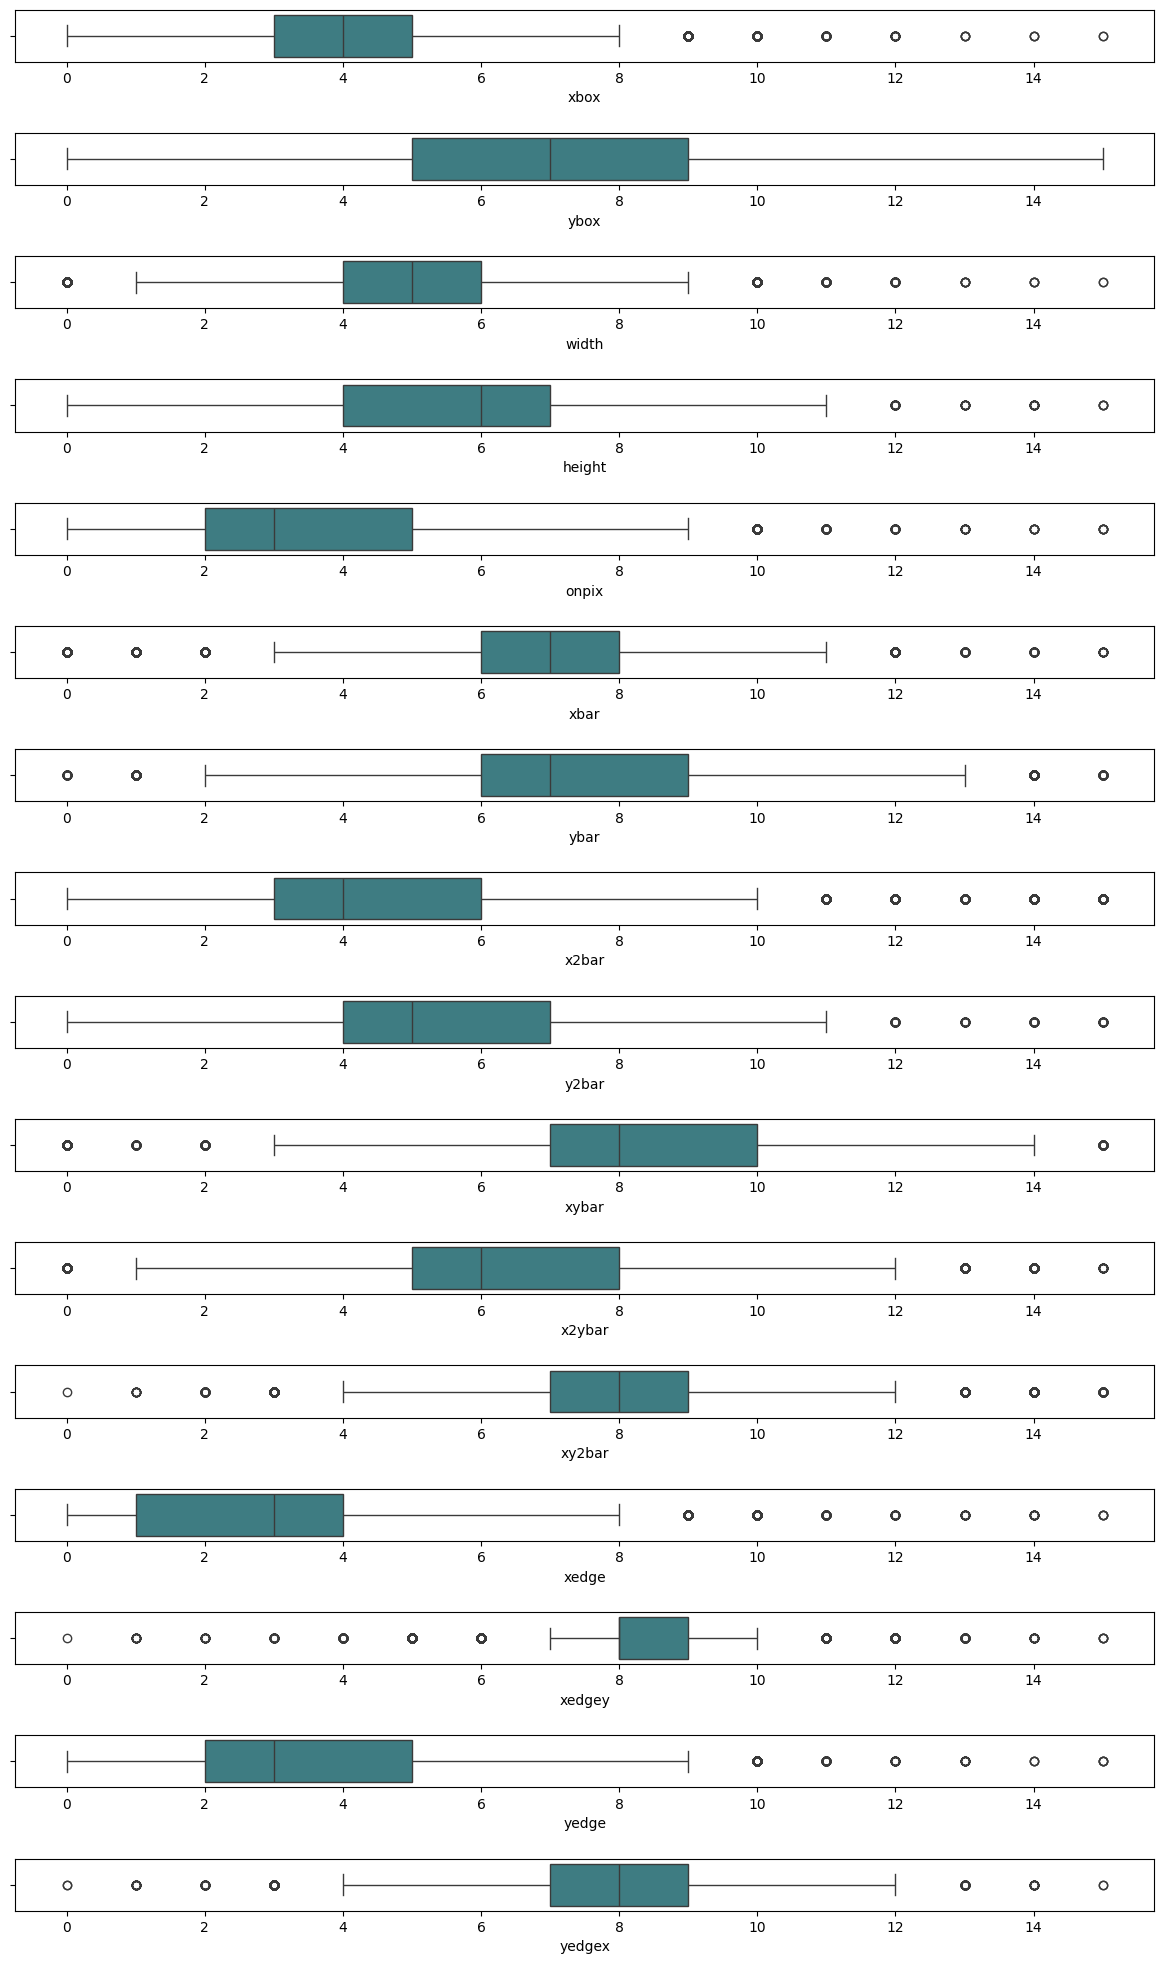

In [22]:
outlier = data.copy() 
fig, axes=plt.subplots(16,1,figsize=(12,20),sharex=False,sharey=False)
sns.boxplot(x='xbox',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='ybox',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='width',data= outlier,palette='crest',ax=axes[2])
sns.boxplot(x='height',data= outlier,palette='crest',ax=axes[3])
sns.boxplot(x='onpix',data= outlier,palette='crest',ax=axes[4])
sns.boxplot(x='xbar',data= outlier,palette='crest',ax=axes[5])
sns.boxplot(x='ybar',data= outlier,palette='crest',ax=axes[6])
sns.boxplot(x='x2bar',data= outlier,palette='crest',ax=axes[7])
sns.boxplot(x='y2bar',data= outlier,palette='crest',ax=axes[8])
sns.boxplot(x='xybar',data= outlier,palette='crest',ax=axes[9])
sns.boxplot(x='x2ybar',data= outlier,palette='crest',ax=axes[10])
sns.boxplot(x='xy2bar',data= outlier,palette='crest',ax=axes[11])
sns.boxplot(x='xedge',data= outlier,palette='crest',ax=axes[12])
sns.boxplot(x='xedgey',data= outlier,palette='crest',ax=axes[13])
sns.boxplot(x='yedge',data= outlier,palette='crest',ax=axes[14])
sns.boxplot(x='yedgex',data= outlier,palette='crest',ax=axes[15])
plt.tight_layout(pad=2.0)

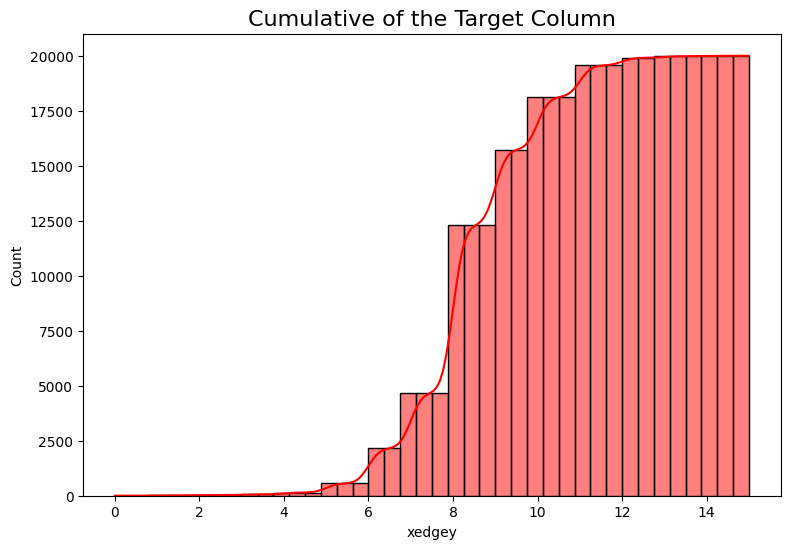

In [26]:
plt.figure(figsize = (9,6))
sns.histplot(data["xedgey"], kde= True, bins= 40, color= "red", cumulative= True)
plt.title("Cumulative of the Target Column", fontsize=16);

Skew: 1.0572883328024414
Kurtosis: 1.2413733232123114


C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\2820863316.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data['xedge'],shade=True,color='g')


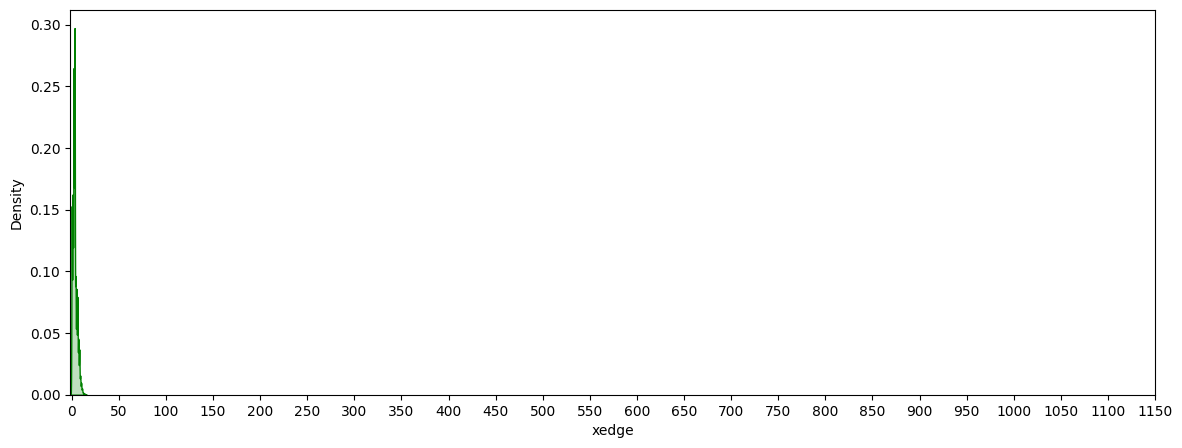

In [28]:
plt.figure(figsize=(14,5))
print("Skew: {}".format(data['xedge'].skew()))
print("Kurtosis: {}".format(data['xedge'].kurtosis()))
ax = sns.kdeplot(data['xedge'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

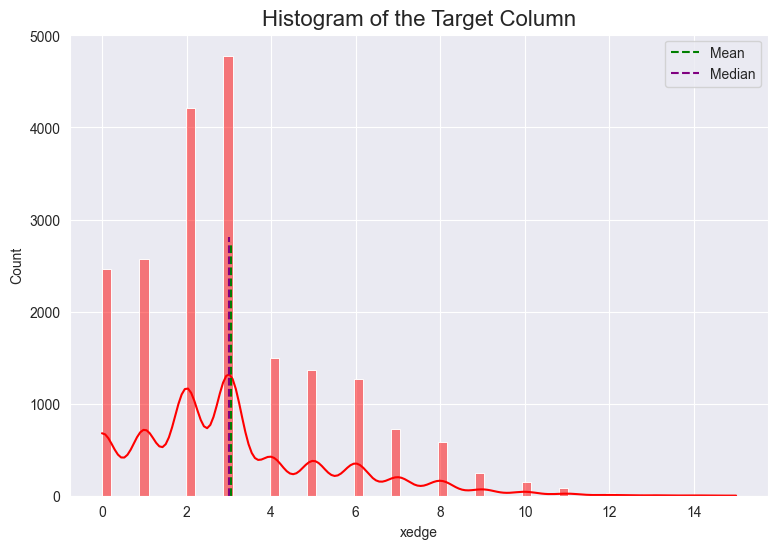

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
sns.histplot(data= data, x= "xedge", color= "red", kde= True)
plt.axvline(x=data["xedge"].mean(), ymax= 0.55, color= "green", linestyle= '--', label= "Mean")
plt.axvline(x=data["xedge"].median(), ymax= 0.56, color= "purple", linestyle= '--',label= "Median")
plt.title("Histogram of the Target Column", fontsize=16)
plt.legend();

In [33]:
data.isnull().any()

letter    False
xbox      False
ybox      False
width     False
height    False
onpix     False
xbar      False
ybar      False
x2bar     False
y2bar     False
xybar     False
x2ybar    False
xy2bar    False
xedge     False
xedgey    False
yedge     False
yedgex    False
dtype: bool

C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\931835504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(data.corr(), dtype= bool)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\931835504.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= data.corr(), cmap= "jet", annot= True, linewidths= 1, linecolor= 'white', mask=mask);


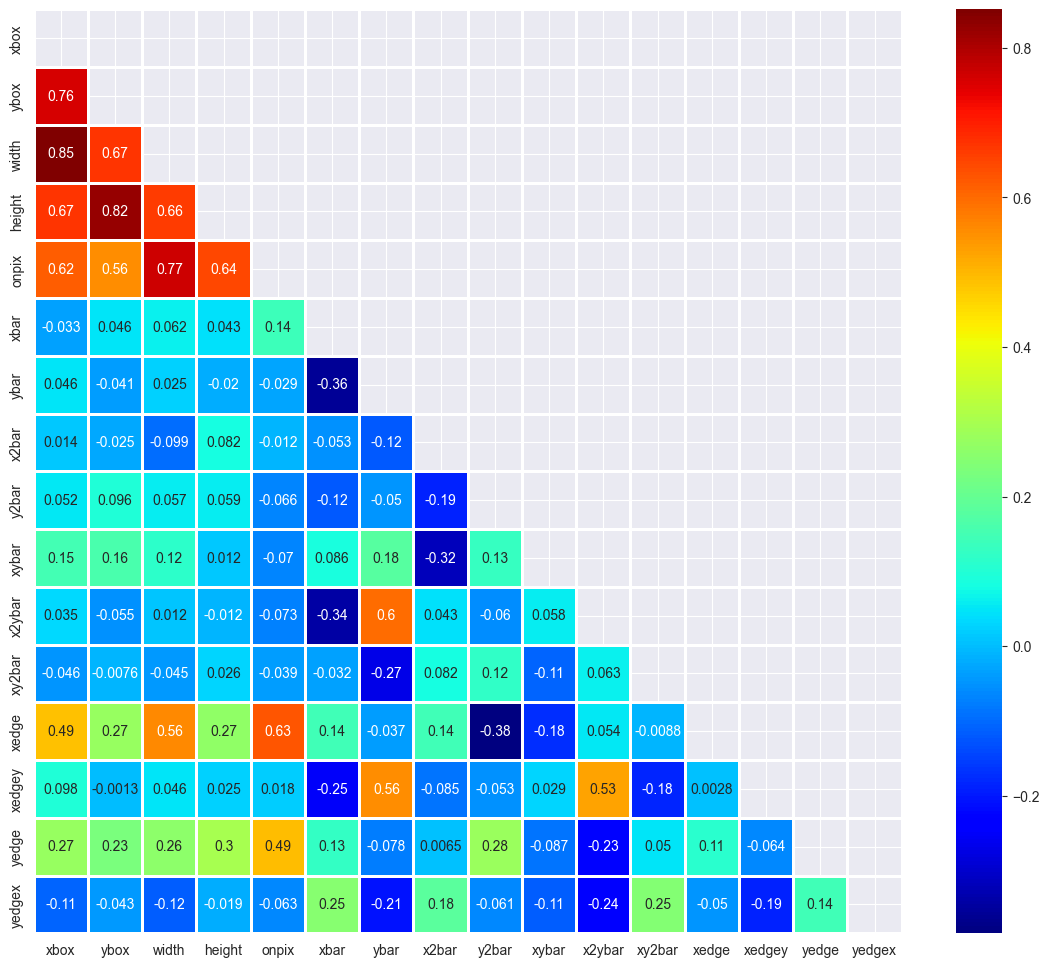

In [37]:
plt.figure(figsize=(14,12))
mask = np.zeros_like(data.corr(), dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data= data.corr(), cmap= "jet", annot= True, linewidths= 1, linecolor= 'white', mask=mask);

In [59]:
x = data.drop('ybar', axis=1)
y = data[["ybar"]]

In [48]:
for feature in data.columns:
    if data[feature].dtypes == 'object':      
        unique_cat = len(data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(data[feature].value_counts())
        print()

Feature 'letter' has 26 unique categories
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64



In [26]:
print(data['xedge'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high

df = data.copy()
def area_cat(xedge):
    if xedge == 0.0:
        return "No damage"
    elif xedge <= 1:
        return "low"
    elif xedge <= 25:
        return "moderate"
    elif xedge <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['xedge'].apply(area_cat)
df.head()

count    20000.000000
mean         3.046100
std          2.332541
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         15.000000
Name: xedge, dtype: float64 



,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,damage_category
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,No damage
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,moderate
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,moderate
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,moderate
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,low


C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\4097148467.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data2.corrwith(data.xedge)


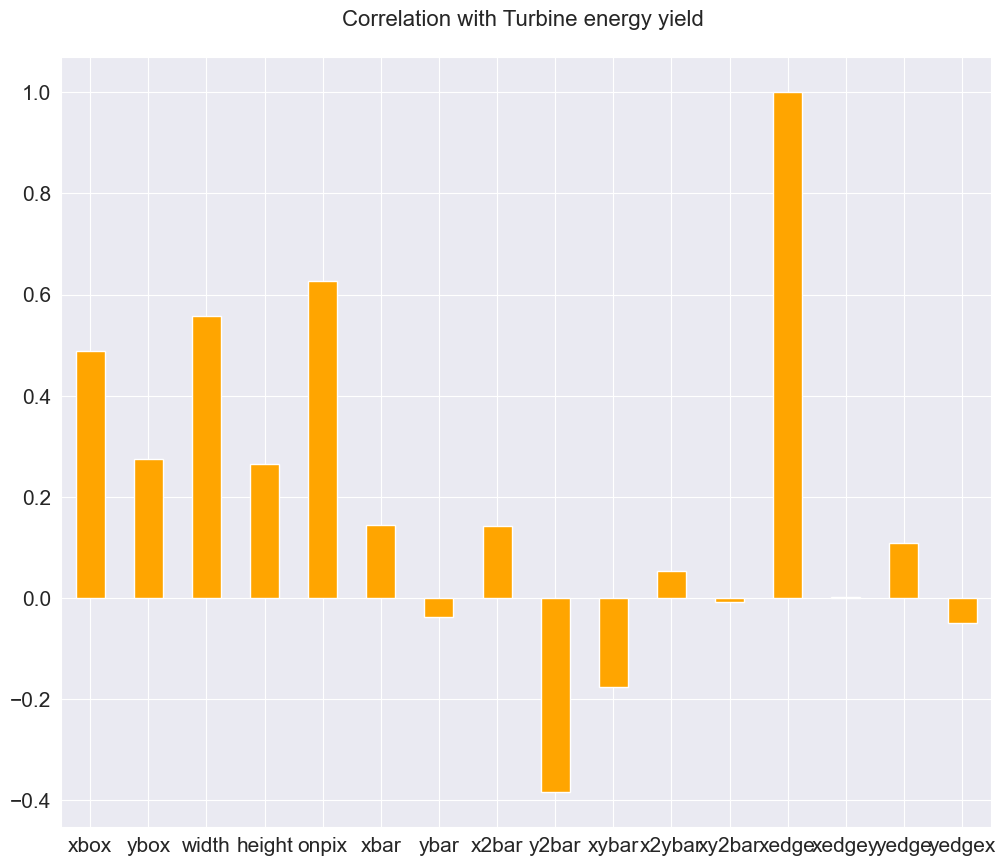

In [55]:
data2 = df.copy()

correlations = data2.corrwith(data.xedge)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations>0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize=(12,10), fontsize = 15, color = 'orange', rot = 0, grid = True)
plt.title('Correlation with Turbine energy yield \n', fontsize = "16", fontfamily = "sans-serif")
plt.show()

In [4]:
model_data = data[['xbar', 'ybar','height', 'yedge', 'yedge', 'x2ybar', 'xedgey',"yedgex"]]
model_data.head()

,xbar,ybar,height,yedge,yedge,x2ybar,xedgey,yedgex
0,8,13,5,0,0,10,8,8
1,10,5,7,4,4,3,8,10
2,10,6,8,3,3,3,7,9
3,5,9,6,2,2,4,10,8
4,8,6,1,5,5,5,7,10


In [8]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 16


In [12]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
data[categorical_features].head()

Number of Categorical Features: 1 
 ['letter']


,letter
0,T
1,I
2,D
3,N
4,G


In [13]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(data[feature].unique()),feature))

26 number of unique categories in feature named letter


In [14]:
df_standard_scaled = data.copy()
features = df_standard_scaled[categorical_features]

In [10]:
scaler = StandardScaler()

df_standard_scaled[categorical_features] = scaler.fit_transform(features.values)
df_standard_scaled.head()

NameError: name 'features' is not defined

In [15]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1))

Mean
 xbox      4.0
ybox      7.0
width     5.1
height    5.4
onpix     3.5
xbar      6.9
ybar      7.5
x2bar     4.6
y2bar     5.2
xybar     8.3
x2ybar    6.5
xy2bar    7.9
xedge     3.0
xedgey    8.3
yedge     3.7
yedgex    7.8
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_6004\3913858423.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Mean' '\n',np.round(df_standard_scaled.mean(),1))


In [16]:
print('Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Standard Devaition 
 xbox      2.0
ybox      3.0
width     2.0
height    2.0
onpix     2.0
xbar      2.0
ybar      2.0
x2bar     3.0
y2bar     2.0
xybar     2.0
x2ybar    3.0
xy2bar    2.0
xedge     2.0
xedgey    2.0
yedge     3.0
yedgex    2.0
dtype: float64 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_6004\2656803443.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Standard Devaition','\n',np.round(df_standard_scaled.std()),1)


In [20]:
x = df_standard_scaled.drop('xedgey',axis=1)
y = df_standard_scaled[['xedgey']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)